**Imports**

In [ ]:
import csv
import numpy as np
import copy
import pprint
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

## **Load CSV files**

In [ ]:
#prepare train_1
with open('train_1.csv', 'r') as f:
  train_1 = np.array(list(csv.reader(f, delimiter=',')), dtype='float64')

dataset_1 = []
for row in train_1:
  target = np.zeros((26, 1))
  target[int(row[-1]),0] = 1
  dataset_1.append({'input':row[:1024].reshape((-1, 1)), 'target':target, 'label':int(row[-1])})

#prepare train_2
with open('train_2.csv', 'r') as f:
  train_2 = np.array(list(csv.reader(f, delimiter=',')), dtype='float64')

dataset_2 = []
for row in train_2:
  target = np.zeros((10, 1))
  target[int(row[-1]),0] = 1
  dataset_2.append({'input':row[:1024].reshape((-1, 1)), 'target':target, 'label':int(row[-1])})

#prepare val_1
with open('val_1.csv', 'r') as f:
  val_1 = np.array(list(csv.reader(f, delimiter=',')), dtype='float64')

val_dataset_1 = []
for row in val_1:
  target = np.zeros((26, 1))
  target[int(row[-1]),0] = 1
  val_dataset_1.append({'input':row[:1024].reshape((-1, 1)), 'target':target, 'label':int(row[-1])})

#prepare val_2
with open('val_2.csv', 'r') as f:
  val_2 = np.array(list(csv.reader(f, delimiter=',')), dtype='float64')

val_dataset_2 = []
for row in val_2:
  target = np.zeros((10, 1))
  target[int(row[-1]),0] = 1
  val_dataset_2.append({'input':row[:1024].reshape((-1, 1)), 'target':target, 'label':int(row[-1])})

#prepare test_with_label_1
with open('test_with_label_1.csv', 'r') as f:
  test_with_label_1 = np.array(list(csv.reader(f, delimiter=',')), dtype='float64')

test_with_label_dataset_1 = []
for row in test_with_label_1:
  target = np.zeros((26, 1))
  target[int(row[-1]),0] = 1
  test_with_label_dataset_1.append({'input':row[:1024].reshape((-1, 1)), 'target':target, 'label':int(row[-1])})

#prepare test_with_label_2
with open('test_with_label_2.csv', 'r') as f:
  test_with_label_2 = np.array(list(csv.reader(f, delimiter=',')), dtype='float64')

test_with_label_dataset_2 = []
for row in test_with_label_2:
  target = np.zeros((10, 1))
  target[int(row[-1]),0] = 1
  test_with_label_dataset_2.append({'input':row[:1024].reshape((-1, 1)), 'target':target, 'label':int(row[-1])})

learning_rate_1 = 0.5
learning_rate_2 = 0.5

## **Neural Network Class**

In [ ]:
class NeuralNetwork():
  def __init__(self, lr, input_size, hidden_size, output_size):
    self.w1 = np.random.uniform(-1, 1, (hidden_size,input_size))
    self.w2 = np.random.uniform(-1, 1, (output_size,hidden_size))
    self.lr = lr
    self.predictions = []
    self.confusion_matrix = np.zeros((output_size,output_size))
    self.outputs = []

  #def init_bias():
  #  self.bh = np.full((1, 100), 0.1)
  #  self.bo = np.full((1, 26), 0.1)
  #  return Bh, Bo

  def sigmoid(self, s, deriv=False):
    if (deriv == True):
      return s * (1 - s)
    return 1/(1 + np.exp(-s))

  def feed_forward(self, input_layer):
    self.hidden_layer = self.sigmoid(self.w1.dot(input_layer)) #generate hidden layer
    self.output_layer = self.sigmoid(self.w2.dot(self.hidden_layer)) #generate output layer
    return self.output_layer 

  def backward_propagate(self, input_layer, target_layer, output_layer):
    self.output_error = (output_layer - target_layer) * self.sigmoid(output_layer, True) #error for output
    self.hidden_error = self.w2.T.dot(self.output_error) * self.sigmoid(self.hidden_layer, True) #error for hidden

    self.w2 += -1 * self.lr * self.output_error.dot(self.hidden_layer.T) #adjust weights for hidden/ouput connections
    self.w1 += -1 * self.lr * self.hidden_error.dot(input_layer.T) #adjust weights for input/hidden connections
  
  def train(self, input_layer, target_layer, label, index, test=False):
    output_layer = self.feed_forward(input_layer)
    self.backward_propagate(input_layer, target_layer, output_layer)
    
    if test:
      #build confusion matrix
      prediction = {'i':index,
                            'target': label,
                            'prediction': np.where(output_layer == np.max(output_layer))[0][0],
                            'value':np.max(output_layer),
                            'output': output_layer}
      self.predictions.append(prediction)

      self.confusion_matrix[prediction['prediction'], prediction['target']] += 1

      print('Training Data:', index)
      print('Target:', label)
      print('Prediction:', prediction['prediction'])
      print('Value:', prediction['value'])
      print('Output Layer:', output_layer)
      print('')

      self.outputs.append([index, prediction['prediction']])

nn = NeuralNetwork(learning_rate_1, 1024, 100, 26)

# **Train Neural Network**

In [ ]:
print('TRAINING')
for epoch in range(2500):
  print('Epoch:', epoch)
  for i, data in enumerate(dataset_1):
    nn.train(data['input'], data['target'], data['label'], i)

TRAINING
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
E

# **Validate**

In [ ]:
print('VALIDATING')
for epoch in range(500):
  print('Epoch:', epoch)
  for i, data in enumerate(val_dataset_1):
    nn.train(data['input'], data['target'], data['label'], i)

VALIDATING
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99

# **Test**

In [ ]:
print('TESTING')
for i, data in enumerate(test_with_label_dataset_1):
  nn.train(data['input'], data['target'], data['label'], i, True)

with open('Base-MLP-DS1.csv', 'w', newline='') as csvfile:
    wr = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)

    for output in nn.outputs:
      wr.writerow(output)

TESTING
Training Data: 0
Target: 4
Prediction: 24
Value: 0.07544588870163248
Output Layer: [[0.00754805]
 [0.02200413]
 [0.06373751]
 [0.02016957]
 [0.02578519]
 [0.02888357]
 [0.02543448]
 [0.02313401]
 [0.04161887]
 [0.03026024]
 [0.02896926]
 [0.03690529]
 [0.03909986]
 [0.02248881]
 [0.02066136]
 [0.02747133]
 [0.03075615]
 [0.00419815]
 [0.01841574]
 [0.02545731]
 [0.016406  ]
 [0.02923404]
 [0.02017256]
 [0.01964318]
 [0.07544589]
 [0.01624728]]

Training Data: 1
Target: 13
Prediction: 24
Value: 0.06792288528080681
Output Layer: [[0.00753895]
 [0.02178587]
 [0.05902822]
 [0.02000093]
 [0.04287398]
 [0.02839897]
 [0.02510062]
 [0.02288135]
 [0.04021833]
 [0.02970504]
 [0.02848046]
 [0.03591585]
 [0.03793038]
 [0.02225635]
 [0.02048028]
 [0.0270529 ]
 [0.03017395]
 [0.00419657]
 [0.01828679]
 [0.02512264]
 [0.0163144 ]
 [0.02873207]
 [0.02000383]
 [0.01948717]
 [0.06792289]
 [0.01615827]]

Training Data: 2
Target: 7
Prediction: 24
Value: 0.06636428219922065
Output Layer: [[0.006607

# **Confusion Matrix**

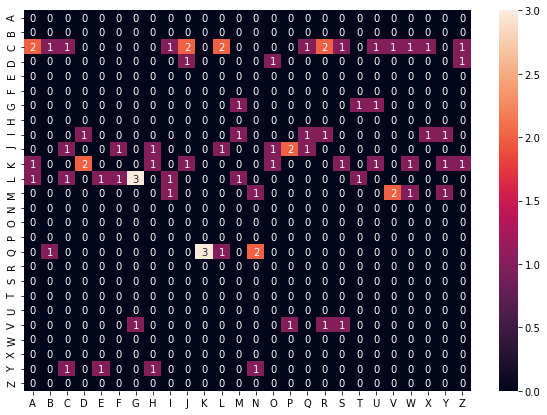

In [ ]:
array = nn.confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                  columns = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# **Statistics**

In [ ]:
# Precision = Sum c in C TruePositives_c / Sum c in C (TruePositives_c + FalsePositives_c)
size_w_h = nn.confusion_matrix.shape[0]
tp = np.identity(size_w_h) * nn.confusion_matrix
ntp = nn.confusion_matrix - tp

accuracy = np.sum(tp)/np.sum(nn.confusion_matrix)

print(tp)
print(ntp)

stats = []
for i in range(26):
  precision = tp[i,i]/(tp[i,i] + np.sum(ntp[i, :]))
  recall = tp[i,i]/(tp[i,i] + np.sum(ntp[:, i]))
  f1 = 0 if precision == 0 and recall == 0 else (2*precision*recall)/(precision+recall)
  
  tn = copy.deepcopy(nn.confusion_matrix)
  tn[:,i] = 0
  tn[i,:] = 0

  stats.append({'i':i,
                'precision': precision,
                'recall': recall,
                'mf1': f1,
                'occurance': np.sum(nn.confusion_matrix[:, i])})

macro_f1 = 0
weighted_f1 = 0
for s in stats:
  macro_f1 += s['mf1']
  weighted_f1 += s['mf1'] * (s['occurance']/np.sum(nn.confusion_matrix))
macro_f1 = macro_f1/len(stats)

#output of precision, recall, f1, accuracy, macro_f1, weighted_f1
pprint.pprint(stats)
print('macro_f1', macro_f1)
print('weighted_f1', weighted_f1)
print('accuracy', accuracy)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
